John Cancer Hospital (JCH) is a leading cancer hospital in USA. It specializes in treating breast cancer. Over the last few years, JCH has collected breast cancer data from patients who came for screening/treatment. However, this data has almost 30 attributes, and it is difficult to run and interpret the results. You, as an ML expert, have to reduce the number of attributes
(Dimensionality Reduction) so that the results are meaningful and accurate.

Objective: Reduce the number of attributes/features in data to make the analysis of the results comprehensible to doctors.
Actions to Perform:

1. Use pandas to read data as a dataframe.
2. Check the data. There should be no missing values.
3. Convert the diagnosis column to 1/0 and store in a new column target.
4. Store the encoded column in dataframe and drop the diagnosis column for simplicity.
5. Scale the data so that each feature has a single unit variance.
6. Transform this data to its first 2 principal components.
7. Plot the two dimensions.
8. Print the explained variance.
9. Try the same with 3 principal components.
10. Check the accuracy for 2nd and 3rd components.

In [220]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [221]:
#accessing directory
! ls

Untitled.ipynb         breast-cancer-data.csv


In [222]:
#loading dataset
cancer = pd.read_csv('breast-cancer-data.csv')

In [223]:
#viewing data
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [224]:
#Checking for missing values
cancer.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [225]:
#Convert the diagnosis column to 1/0 and store in a new column target. We will use labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [226]:
#Getting unique values for diagnosis
cancer['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [227]:
#Viewing new data
cancer['new_diagnosis'] = le.fit_transform(cancer['diagnosis'])
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,new_diagnosis
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [228]:
#dropping diagnosis from dataframe
df_cancer = cancer.drop('diagnosis', axis = 1)
df_cancer.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,new_diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [229]:
#Extracting x features and y target
X = df_cancer.drop(['new_diagnosis'], axis = 1)
y = df_cancer['new_diagnosis']

In [230]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)

In [231]:
#Using Principle Component Analysis to transform data into its first 2 component
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(x_scaled)
xscaled_trans = pca.transform(x_scaled)

In [232]:
#getting shape of original data
x_scaled.shape

(569, 31)

In [233]:
#Getting shape of transformed data
xscaled_trans.shape

(569, 2)

In [234]:
#Checking the accuracy of this data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [235]:
#Scaling trained and test data
x_train_scaled = scaler.transform(xtrain)
x_test_scaled = scaler.transform(xtest)

In [236]:
#Transforming scaled train and test data
x_train_scaled = pca.transform(x_train_scaled)
x_test_scaled = pca.transform(x_test_scaled)

In [237]:
lg = LogisticRegression()
lg.fit(x_train_scaled, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [238]:
#Ac
lg.score(x_test_scaled, ytest)

0.9707602339181286

Text(0, 0.5, 'Second Principal Component')

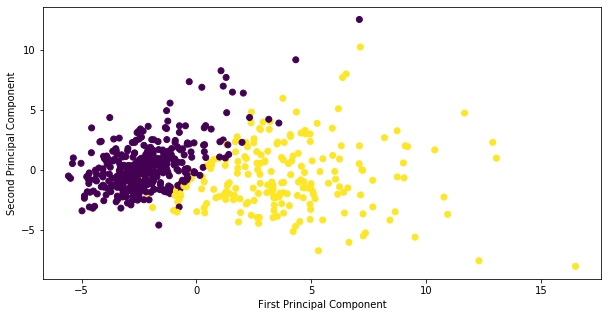

In [239]:
#Plotting the 2 dimension
plt.figure(figsize=(10,5))
plt.scatter(xscaled_trans[:,0],xscaled_trans[:,1],c=y,cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [240]:
#Printing components
pca.components_

array([[ 0.02291216,  0.21891302,  0.10384388,  0.22753491,  0.22104577,
         0.14241471,  0.2390673 ,  0.25828025,  0.26073811,  0.13797774,
         0.06414779,  0.20611747,  0.01741339,  0.21144652,  0.20307642,
         0.01467821,  0.1702884 ,  0.15354367,  0.18340675,  0.04241552,
         0.10249607,  0.22800935,  0.10451545,  0.23663734,  0.22493214,
         0.12782441,  0.20988456,  0.22860218,  0.2507462 ,  0.12267993,
         0.13156024],
       [-0.03406849, -0.2332714 , -0.0600442 , -0.214589  , -0.23066882,
         0.18642221,  0.15245473,  0.06054163, -0.03416739,  0.19068498,
         0.36653106, -0.1059357 ,  0.08954779, -0.08980704, -0.15277129,
         0.20318988,  0.23250336,  0.19684608,  0.12996518,  0.18355863,
         0.27958414, -0.21929604, -0.04550122, -0.19929599, -0.21898546,
         0.17256296,  0.14425364,  0.09852652, -0.00753437,  0.14261944,
         0.27570208]])

In [241]:
#Printing explained variance
pca.explained_variance_

array([13.31145188,  5.70683496])

In [242]:
#Now doing for 3 components
pca_3 = PCA(n_components = 3)
pca_3.fit(x_scaled)
xscaled_trans_3 = pca_3.transform(x_scaled)

In [243]:
#Getting shape of transformed data
xscaled_trans_3.shape

(569, 3)

In [244]:

train_data, test_data, train_output, test_output = train_test_split(X, y, test_size=0.3, random_state=42)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

train_data = pca_3.transform(train_data)
test_data = pca_3.transform(test_data)
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(train_data, train_output)
logisticRegr.score(test_data, test_output)

0.9766081871345029